# Car Price Prediction System

### By Mahmood Rasheed

In [630]:
# import pandas and numpy libraries
import pandas as pd
import numpy as np

In [631]:
# load dataset
df = pd.read_csv("car_price.csv")

In [632]:
# first five rows
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [633]:
# number of rows and columns
r, c = df.shape

print(f"This dataset contains {r} rows and {c} coulmns.")

This dataset contains 892 rows and 6 coulmns.


In [634]:
# last 5 rows
df.tail()

,name,company,year,Price,kms_driven,fuel_type
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
891,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


# **Data Cleaning**

In [635]:
# number of duplicate values

df.duplicated().sum()

94

In [636]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [637]:
# after removing duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [638]:
# number of rows and columns after removing duplicate values
r, c = df.shape

print(f"This dataset contains {r} rows and {c} coulmns.")

This dataset contains 798 rows and 6 coulmns.


In [639]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    50
fuel_type     53
dtype: int64

# "name" Column

In [640]:
df["name"].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [641]:
# transforming into lower case
df["name"] = df["name"].str.lower()
df["name"]

0        hyundai santro xing xo erlx euro iii
1                     mahindra jeep cl550 mdi
2                  maruti suzuki alto 800 vxi
3      hyundai grand i10 magna 1.2 kappa vtvt
4            ford ecosport titanium 1.5l tdci
                        ...                  
887                                        ta
888                       tata zest xm diesel
889                        mahindra quanto c8
890                  honda amaze 1.2 e i vtec
891                 chevrolet sail 1.2 lt abs
Name: name, Length: 798, dtype: object

In [642]:
df["name"].unique()

array(['hyundai santro xing xo erlx euro iii', 'mahindra jeep cl550 mdi',
       'maruti suzuki alto 800 vxi',
       'hyundai grand i10 magna 1.2 kappa vtvt',
       'ford ecosport titanium 1.5l tdci', 'ford figo', 'hyundai eon',
       'ford ecosport ambiente 1.5l tdci',
       'maruti suzuki alto k10 vxi amt', 'skoda fabia classic 1.2 mpi',
       'maruti suzuki stingray vxi', 'hyundai elite i20 magna 1.2',
       'mahindra scorpio sle bs iv', 'audi a8', 'audi q7',
       'mahindra scorpio s10', 'maruti suzuki alto 800',
       'hyundai i20 sportz 1.2', 'maruti suzuki alto 800 lx',
       'maruti suzuki vitara brezza zdi', 'maruti suzuki alto lx',
       'mahindra bolero di', 'maruti suzuki swift dzire zdi',
       'mahindra scorpio s10 4wd', 'maruti suzuki swift vdi bsiii',
       'maruti suzuki wagon r vxi bs iii',
       'maruti suzuki wagon r vxi minor',
       'toyota innova 2.0 g 8 str bs iv', 'renault lodgy 85 ps rxl',
       'skoda yeti ambition 2.0 tdi cr 4x2',
       'maru

In [643]:
df["name"].nunique()

523

In [644]:
# correcting names of cars

df["name"].replace("used bt new conditions ta", "unknown", inplace=True)

df["name"].replace("sale tata", "unknown", inplace=True)
df["name"].replace("very good condition tata bolts are av", "tata bolts", inplace=True)
df["name"].replace("i want to sell my commercial car due t", "unknown", inplace=True)
df["name"].replace("i want sale my car.no emi....uber atta", "unknown", inplace=True)
df["name"].replace("tata zest 6 month old", "tata zest", inplace=True)
df["name"].replace("tata", "unknown", inplace=True)
df["name"].replace("well mentained tata sumo", "tata sumo", inplace=True)
df["name"].replace("maruti ertiga showroom condition with", "maruti ertiga", inplace=True)
df["name"].replace("7 seater mahindra bolero in very good", "mahindra bolero neo", inplace=True)
df["name"].replace("9 seater mahindra bol", "mahindra bolero neo plus", inplace=True)
df["name"].replace("scratch less tata i", "tata indica", inplace=True)
df["name"].replace("maruti suzuki swift dzire for sale in", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("commercial chevrolet beat for sale in", "chevrolet beat", inplace=True)
df["name"].replace("urgent sell my mahindra qu", "mahindra quanto", inplace=True)
df["name"].replace("sell my car maruti suzuki swif", "maruti suzuki swift", inplace=True)
df["name"].replace("maruti suzuki swift dzire good car fo", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("hyunda", "unknown", inplace=True)
df["name"].replace("commercial maruti suzuki alto lxi 800", "maruti suzuki alto lxi 800", inplace=True)
df["name"].replace("urgent sale ta", "unknown", inplace=True)
df["name"].replace("maruti suzuki alto vxi t", "maruti suzuki alto vxi", inplace=True)
df["name"].replace("tata", "unknown", inplace=True)
df["name"].replace("tata indi", "tata indica", inplace=True)
df["name"].replace("maruti suzuki swift select variant", "maruti suzuki swift", inplace=True)
df["name"].replace("any type car avaiabel hare...comercica", "unknown", inplace=True)
df["name"].replace("maruti suzuki alto 800 select variant", "maruti suzuki alto lxi 800", inplace=True)
df["name"].replace("ta", "unknown", inplace=True)
df["name"].replace("i want to sell my car tata zest", "tata zest", inplace=True)
df["name"].replace("commercial , dzire ldi, 2016, for sale", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("selling car ta", "unknown", inplace=True)
df["name"].replace("maruti suzuki wagon r select variant", "maruti suzuki wagon r", inplace=True)
df["name"].replace("maruti suzuki alto 800 lx", "maruti suzuki alto 800 lxi", inplace=True)
df["name"].replace("maruti suzuki alto lx", "maruti suzuki alto 800 lxi", inplace=True)
df["name"].replace("maruti suzuki swift dzire zdi", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("maruti suzuki swift dzire vxi 1.2 bs iv", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("volkswagen polo comfortline 1.2l p", "volkswagen polo", inplace=True)
df["name"].replace("hindustan motors ambassador", "unknown", inplace=True)
df["name"].replace("maruti suzuki dzire", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("tata zest 90", "tata zest", inplace=True)
df["name"].replace("maruti suzuki swift dzire car", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("maruti suzuki swift dzire tour ldi", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("maruti suzuki swift dzire vxi 1.2 bs iv", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("maruti suzuki swift dzire tour (gat", "maruti suzuki swift dzire", inplace=True)
df["name"].replace("commercial chevrolet sail hatchback ca", "chevrolet sail hatchback", inplace=True)
df["name"].replace("commercial car ta", "unknown", inplace=True)
df["name"].replace("sale hyundai xcent commerc", "hyundai xcent", inplace=True)
df["name"].replace("urje", "unknown", inplace=True)
df["name"].replace("maruti suzuki alto lxi bs iii", "maruti suzuki alto 800 lxi", inplace=True)
df["name"].replace("tata zest x", "tata zest", inplace=True)
df["name"].replace("honda city sv", "honda city", inplace=True)
df["name"].replace("hyun", "unknown", inplace=True)
df["name"].replace("ta", "unknown", inplace=True)
df["name"].replace("used commercial maruti omn", "maruti omni", inplace = True)
df["name"].replace("hindustan motors ambassador classic mark 4 – befo", "classic mark 4", inplace = True)
df["name"].replace("2012 tata sumo gold f", "tata sumo", inplace=True)
df["name"].replace("all paper updated tata indica v2 and u", "tata indica", inplace=True)
df["name"].replace("tata indigo ecs lx, 201", "tata indigo ecs", inplace=True)
df["name"].replace("swift dzire tour 27 dec 2016 regis", "maruti suzuki swift dzire", inplace=True)





# after correction

df["name"].nunique()

482

In [645]:
df[df["name"] == "unknown"]

,name,company,year,Price,kms_driven,fuel_type
139,unknown,Hindustan,2000,"70,000","2,00,000 kms",Diesel
360,unknown,selling,Zest,Ask For Price,NaN,NaN
401,unknown,URJENT,SELL,"1,80,000",NaN,NaN
514,unknown,Hindustan,2002,"90,000","25,000 kms",Diesel
560,unknown,Hyundai,Eon,Ask For Price,NaN,NaN
599,unknown,Commercial,Zest,"3,71,500",NaN,NaN
614,unknown,Used,Zest,"2,55,000",NaN,NaN
616,unknown,Sale,ture,"1,00,000",NaN,NaN
723,unknown,I,o...,"4,75,000",NaN,NaN
725,unknown,i,d...,"3,20,000",NaN,NaN


In [646]:
# cars having name "unknown" have mostly nan and inconsistant data
# like company contains any, Tara, urgent, etc
# I am removing rows having name "unkown" 

df = df[df["name"] != "unknown"]
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,Hyundai,2007,"80,000","45,000 kms",Petrol
1,mahindra jeep cl550 mdi,Mahindra,2006,"4,25,000",40 kms,Diesel
2,maruti suzuki alto 800 vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,ford ecosport titanium 1.5l tdci,Ford,2014,"5,75,000","36,000 kms",Diesel


In [647]:
# no null value in name column
df["name"].info()

<class 'pandas.core.series.Series'>
Index: 782 entries, 0 to 891
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
782 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [648]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,Hyundai,2007,"80,000","45,000 kms",Petrol
1,mahindra jeep cl550 mdi,Mahindra,2006,"4,25,000",40 kms,Diesel
2,maruti suzuki alto 800 vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,ford ecosport titanium 1.5l tdci,Ford,2014,"5,75,000","36,000 kms",Diesel


# **"company" Column**

In [649]:
df["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Fiat', 'Commercial',
       'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha', 'Swift', 'Used',
       'Jaguar', 'Jeep', 'tata', 'very', 'Sale', 'Volvo', 'Hindustan',
       '2012', 'Well', 'all', '7', '9', 'scratch', 'urgent', 'sell',
       'TATA'], dtype=object)

In [650]:
df["company"] = df["company"].str.lower()
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'i', 'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'commercial',
       'force', 'mercedes', 'land', 'yamaha', 'swift', 'used', 'jaguar',
       'jeep', 'very', 'sale', 'volvo', 'hindustan', '2012', 'well',
       'all', '7', '9', 'scratch', 'urgent', 'sell'], dtype=object)

In [651]:
data =df[df["company"] == "i"] 
data

,name,company,year,Price,kms_driven,fuel_type
69,tata zest,i,2017,Ask For Price,NaN,NaN


In [652]:
df["company"].replace("i", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'commercial',
       'force', 'mercedes', 'land', 'yamaha', 'swift', 'used', 'jaguar',
       'jeep', 'very', 'sale', 'volvo', 'hindustan', '2012', 'well',
       'all', '7', '9', 'scratch', 'urgent', 'sell'], dtype=object)

In [653]:
data =df[df["company"] == "commercial"] 

data

,name,company,year,Price,kms_driven,fuel_type
185,maruti suzuki swift dzire,commercial,...,Ask For Price,NaN,NaN
593,chevrolet sail hatchback,commercial,o...,"2,25,000",NaN,NaN
802,chevrolet beat,commercial,k...,"1,80,000",NaN,NaN
808,maruti suzuki alto lxi 800,commercial,...,Ask For Price,NaN,NaN


In [654]:
df["company"].loc[185] = "maruti"
df["company"].loc[593] = "chevrolet"
df["company"].loc[802] = "chevrolet"
df["company"].loc[808] = "maruti"


print(df.loc[185])
print()
print(df.loc[593])
print()
print(df.loc[802])
print()
print(df.loc[808])

name          maruti suzuki swift dzire
company                          maruti
year                                ...
Price                     Ask For Price
kms_driven                          NaN
fuel_type                           NaN
Name: 185, dtype: object

name          chevrolet sail hatchback
company                      chevrolet
year                              o...
Price                         2,25,000
kms_driven                         NaN
fuel_type                          NaN
Name: 593, dtype: object

name          chevrolet beat
company            chevrolet
year                    k...
Price               1,80,000
kms_driven               NaN
fuel_type                NaN
Name: 802, dtype: object

name          maruti suzuki alto lxi 800
company                           maruti
year                                 ...
Price                      Ask For Price
kms_driven                           NaN
fuel_type                            NaN
Name: 808, dtype: object


In [655]:
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'used', 'jaguar', 'jeep', 'very',
       'sale', 'volvo', 'hindustan', '2012', 'well', 'all', '7', '9',
       'scratch', 'urgent', 'sell'], dtype=object)

In [656]:
data =df[df["company"] == "used"] 

data

,name,company,year,Price,kms_driven,fuel_type
441,maruti omni,used,arry,"1,50,000",NaN,NaN


In [657]:
df["company"].replace("used", "maruti", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'very', 'sale',
       'volvo', 'hindustan', '2012', 'well', 'all', '7', '9', 'scratch',
       'urgent', 'sell'], dtype=object)

In [658]:
data =df[df["company"] == "very"] 

data

,name,company,year,Price,kms_driven,fuel_type
643,tata bolts,very,able,"2,00,000",NaN,NaN


In [659]:
df["company"].replace("very", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'sale', 'volvo',
       'hindustan', '2012', 'well', 'all', '7', '9', 'scratch', 'urgent',
       'sell'], dtype=object)

In [660]:
data =df[df["company"] == "sale"] 

data

,name,company,year,Price,kms_driven,fuel_type
645,hyundai xcent,sale,no.,Ask For Price,NaN,NaN


In [661]:
df["company"].replace("sale", "hyundai", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo', 'hindustan',
       '2012', 'well', 'all', '7', '9', 'scratch', 'urgent', 'sell'],
      dtype=object)

In [662]:
data =df[df["company"] == "hindustan"] 

data

,name,company,year,Price,kms_driven,fuel_type
768,classic mark 4,hindustan,1995,"7,50,000","37,000 kms",Petrol


In [663]:
df["company"].replace("hindustan", "hindustan motors", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', '2012', 'well', 'all', '7', '9', 'scratch',
       'urgent', 'sell'], dtype=object)

In [664]:
data =df[df["company"] == "2012"] 

data

,name,company,year,Price,kms_driven,fuel_type
792,tata sumo,2012,sell,"2,50,000",NaN,NaN


In [665]:
df["company"].replace("2012", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', 'well', 'all', '7', '9', 'scratch', 'urgent',
       'sell'], dtype=object)

In [666]:
data =df[df["company"] == "well"] 

data

,name,company,year,Price,kms_driven,fuel_type
795,tata sumo,well,d Ex,"3,80,000",NaN,NaN


In [667]:
df["company"].replace("well", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', 'all', '7', '9', 'scratch', 'urgent', 'sell'],
      dtype=object)

In [668]:
data =df[df["company"] == "all"] 

data

,name,company,year,Price,kms_driven,fuel_type
796,tata indica,all,n...,"1,45,000",NaN,NaN


In [669]:
df["company"].replace("all", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', '7', '9', 'scratch', 'urgent', 'sell'],
      dtype=object)

In [670]:
data =df[df["company"] == "7"] 

data

,name,company,year,Price,kms_driven,fuel_type
798,mahindra bolero neo,7,D...,Ask For Price,NaN,NaN


In [671]:
df["company"].replace("7", "mahindra", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', '9', 'scratch', 'urgent', 'sell'], dtype=object)

In [672]:
data = df[df["company"] == "9"] 

data

,name,company,year,Price,kms_driven,fuel_type
799,mahindra bolero neo plus,9,", Ac",Ask For Price,NaN,NaN


In [673]:
df["company"].replace("9", "mahindra", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', 'scratch', 'urgent', 'sell'], dtype=object)

In [674]:
data = df[df["company"] == "scratch"] 

data

,name,company,year,Price,kms_driven,fuel_type
800,tata indica,scratch,go .,"1,40,000",NaN,NaN


In [675]:
df["company"].replace("scratch", "tata", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', 'urgent', 'sell'], dtype=object)

In [676]:
data = df[df["company"] == "urgent"] 

data

,name,company,year,Price,kms_driven,fuel_type
803,mahindra quanto,urgent,o c4,"3,50,000",NaN,NaN


In [677]:
df["company"].replace("urgent", "mahindra", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors', 'sell'], dtype=object)

In [678]:
data = df[df["company"] == "sell"] 

data

,name,company,year,Price,kms_driven,fuel_type
805,maruti suzuki swift,sell,zire,"3,00,000",NaN,NaN


In [679]:
df["company"].replace("sell", "maruti", inplace = True)
df["company"].unique()

array(['hyundai', 'mahindra', 'maruti', 'ford', 'skoda', 'audi', 'toyota',
       'renault', 'honda', 'datsun', 'mitsubishi', 'tata', 'volkswagen',
       'chevrolet', 'mini', 'bmw', 'nissan', 'fiat', 'force', 'mercedes',
       'land', 'yamaha', 'swift', 'jaguar', 'jeep', 'volvo',
       'hindustan motors'], dtype=object)

In [680]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    36
fuel_type     39
dtype: int64

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        782 non-null    object
 1   company     782 non-null    object
 2   year        782 non-null    object
 3   Price       782 non-null    object
 4   kms_driven  746 non-null    object
 5   fuel_type   743 non-null    object
dtypes: object(6)
memory usage: 58.9+ KB


# **"year" column**

In [682]:
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '...',
       '2000', '150k', 'TOUR', '2003', 'r 15', '2004', '/-Rs', 'sale',
       '1995', 'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'arry',
       'o...', 'emi', 'car', 'able', 'no.', 'SALE', 'sell', 'd Ex',
       'n...', 'e...', 'D...', ', Ac', 'go .', 'd...', 'k...', 'o c4',
       'zire', 'cab', 'EV2'], dtype=object)

In [683]:
data = df[df["year"] == "..."] 

data

,name,company,year,Price,kms_driven,fuel_type
185,maruti suzuki swift dzire,maruti,...,Ask For Price,NaN,NaN
808,maruti suzuki alto lxi 800,maruti,...,Ask For Price,NaN,NaN


In [684]:
df["year"].replace("...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '150k', 'TOUR', '2003', 'r 15', '2004', '/-Rs', 'sale',
       '1995', 'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'arry',
       'o...', 'emi', 'car', 'able', 'no.', 'SALE', 'sell', 'd Ex',
       'n...', 'e...', 'D...', ', Ac', 'go .', 'd...', 'k...', 'o c4',
       'zire', 'cab', 'EV2'], dtype=object)

In [685]:
data = df[df["year"] == "150k"] 

data

,name,company,year,Price,kms_driven,fuel_type
195,tata indigo ecs,tata,150k,"1,50,000",NaN,NaN


In [686]:
df["year"].replace("150k", "2010", inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', 'TOUR', '2003', 'r 15', '2004', '/-Rs', 'sale', '1995',
       'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'emi', 'car', 'able', 'no.', 'SALE', 'sell', 'd Ex', 'n...',
       'e...', 'D...', ', Ac', 'go .', 'd...', 'k...', 'o c4', 'zire',
       'cab', 'EV2'], dtype=object)

In [687]:
df["year"] = df["year"].str.lower()
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', 'tour', '2003', 'r 15', '2004', '/-rs', 'sale', '1995',
       'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'emi', 'car', 'able', 'no.', 'sell', 'd ex', 'n...', 'e...',
       'd...', ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'],
      dtype=object)

In [688]:
data = df[df["year"] == "tour"] 

data

,name,company,year,Price,kms_driven,fuel_type
206,maruti suzuki desi,maruti,tour,"4,00,000",NaN,NaN


In [689]:
df["year"].replace("tour", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', 'r 15', '2004', '/-rs', 'sale', '1995', 'ara)',
       '2002', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...', 'emi',
       'car', 'able', 'no.', 'sell', 'd ex', 'n...', 'e...', 'd...',
       ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [690]:
data = df[df["year"] == "r 15"] 

data

,name,company,year,Price,kms_driven,fuel_type
294,yama,yamaha,r 15,"55,000",NaN,NaN


In [691]:
df["year"].replace("r 15", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '/-rs', 'sale', '1995', 'ara)', '2002',
       '2001', 'tion', 'odel', '2 bs', 'arry', 'o...', 'emi', 'car',
       'able', 'no.', 'sell', 'd ex', 'n...', 'e...', 'd...', ', ac',
       'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [692]:
data = df[df["year"] == "/-rs"] 

data

,name,company,year,Price,kms_driven,fuel_type
368,tata zest,tata,/-rs,Ask For Price,NaN,NaN


In [693]:
df["year"].replace("/-rs", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', 'sale', '1995', 'ara)', '2002', '2001',
       'tion', 'odel', '2 bs', 'arry', 'o...', 'emi', 'car', 'able',
       'no.', 'sell', 'd ex', 'n...', 'e...', 'd...', ', ac', 'go .',
       'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [694]:
data = df[df["year"] == "sale"] 

data

,name,company,year,Price,kms_driven,fuel_type
385,maruti suzuki swift dzire,maruti,sale,"3,00,000",NaN,NaN
608,tata indica,tata,sale,"1,30,000",NaN,NaN
758,maruti suzuki ertiga f,maruti,sale,"6,50,000",NaN,NaN
884,tata zest 2017 f,tata,sale,"4,50,000",NaN,NaN


In [695]:
df["year"].replace("sale", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', 'ara)', '2002', '2001', 'tion',
       'odel', '2 bs', 'arry', 'o...', 'emi', 'car', 'able', 'no.',
       'sell', 'd ex', 'n...', 'e...', 'd...', ', ac', 'go .', 'k...',
       'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [696]:
data = df[df["year"] == "ara)"] 

data

,name,company,year,Price,kms_driven,fuel_type
395,maruti suzuki swift dzire,maruti,ara),"3,00,000",NaN,NaN


In [697]:
df["year"].replace("ara)", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'o...', 'emi', 'car', 'able', 'no.', 'sell',
       'd ex', 'n...', 'e...', 'd...', ', ac', 'go .', 'k...', 'o c4',
       'zire', 'cab', 'ev2'], dtype=object)

In [698]:
data = df[df["year"] == "tion"] 

data

,name,company,year,Price,kms_driven,fuel_type
414,maruti suzuki swift dzire,swift,tion,"3,70,000",NaN,NaN


In [699]:
df["year"].replace("tion", "2016", inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'odel', '2 bs',
       'arry', 'o...', 'emi', 'car', 'able', 'no.', 'sell', 'd ex',
       'n...', 'e...', 'd...', ', ac', 'go .', 'k...', 'o c4', 'zire',
       'cab', 'ev2'], dtype=object)

In [700]:
data = df[df["year"] == "odel"] 

data

,name,company,year,Price,kms_driven,fuel_type
432,tata zest,tata,odel,"3,20,000",NaN,NaN


In [701]:
df["year"].replace("odel", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', '2 bs', 'arry',
       'o...', 'emi', 'car', 'able', 'no.', 'sell', 'd ex', 'n...',
       'e...', 'd...', ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab',
       'ev2'], dtype=object)

In [702]:
data = df[df["year"] == "2 bs"] 

data

,name,company,year,Price,kms_driven,fuel_type
433,mahindra xyl,mahindra,2 bs,"3,50,000",NaN,NaN


In [703]:
df["year"].replace("2 bs", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'arry', 'o...',
       'emi', 'car', 'able', 'no.', 'sell', 'd ex', 'n...', 'e...',
       'd...', ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'],
      dtype=object)

In [704]:
data = df[df["year"] == "arry"] 

data

,name,company,year,Price,kms_driven,fuel_type
441,maruti omni,maruti,arry,"1,50,000",NaN,NaN


In [705]:
df["year"].replace("arry", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'o...', 'emi',
       'car', 'able', 'no.', 'sell', 'd ex', 'n...', 'e...', 'd...',
       ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [706]:
data = df[df["year"] == "o..."] 

data

,name,company,year,Price,kms_driven,fuel_type
593,chevrolet sail hatchback,chevrolet,o...,"2,25,000",NaN,NaN
806,maruti suzuki swift dzire,maruti,o...,"3,10,000",NaN,NaN


In [707]:
df["year"].replace("o...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'emi', 'car',
       'able', 'no.', 'sell', 'd ex', 'n...', 'e...', 'd...', ', ac',
       'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [708]:
data = df[df["year"] == "emi"] 

data

,name,company,year,Price,kms_driven,fuel_type
624,tata indigo 2017 top model..,tata,emi,"1,70,000",NaN,NaN


In [709]:
df["year"].replace("emi", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'car', 'able',
       'no.', 'sell', 'd ex', 'n...', 'e...', 'd...', ', ac', 'go .',
       'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [710]:
data = df[df["year"] == "car"] 

data

,name,company,year,Price,kms_driven,fuel_type
635,tata indigo,tata,car,"1,50,000",NaN,NaN
728,tata zest,tata,car,"3,70,000",NaN,NaN


In [711]:
df["year"].replace("car", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'able', 'no.',
       'sell', 'd ex', 'n...', 'e...', 'd...', ', ac', 'go .', 'k...',
       'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [712]:
data = df[df["year"] == "able"] 

data

,name,company,year,Price,kms_driven,fuel_type
643,tata bolts,tata,able,"2,00,000",NaN,NaN


In [713]:
df["year"].replace("able", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'no.', 'sell',
       'd ex', 'n...', 'e...', 'd...', ', ac', 'go .', 'k...', 'o c4',
       'zire', 'cab', 'ev2'], dtype=object)

In [714]:
data = df[df["year"] == "no."] 

data

,name,company,year,Price,kms_driven,fuel_type
645,hyundai xcent,hyundai,no.,Ask For Price,NaN,NaN


In [715]:
df["year"].replace("no.", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'sell', 'd ex',
       'n...', 'e...', 'd...', ', ac', 'go .', 'k...', 'o c4', 'zire',
       'cab', 'ev2'], dtype=object)

In [716]:
data = df[df["year"] == "sell"] 

data

,name,company,year,Price,kms_driven,fuel_type
792,tata sumo,tata,sell,"2,50,000",NaN,NaN


In [717]:
df["year"].replace("sell", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'd ex', 'n...',
       'e...', 'd...', ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab',
       'ev2'], dtype=object)

In [718]:
data = df[df["year"] == "d ex"] 

data

,name,company,year,Price,kms_driven,fuel_type
795,tata sumo,tata,d ex,"3,80,000",NaN,NaN


In [719]:
df["year"].replace("d ex", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'n...', 'e...',
       'd...', ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'],
      dtype=object)

In [720]:
data = df[df["year"] == "n..."] 

data

,name,company,year,Price,kms_driven,fuel_type
796,tata indica,tata,n...,"1,45,000",NaN,NaN


In [721]:
df["year"].replace("n...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'e...', 'd...',
       ', ac', 'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [722]:
data = df[df["year"] == "e..."] 

data

,name,company,year,Price,kms_driven,fuel_type
797,maruti ertiga,maruti,e...,"4,80,000",NaN,NaN


In [723]:
df["year"].replace("e...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'd...', ', ac',
       'go .', 'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [724]:
data = df[df["year"] == "d..."] 

data

,name,company,year,Price,kms_driven,fuel_type
798,mahindra bolero neo,mahindra,d...,Ask For Price,NaN,NaN
801,maruti suzuki swift dzire,maruti,d...,"3,60,000",NaN,NaN


In [725]:
df["year"].replace("d...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', ', ac', 'go .',
       'k...', 'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [726]:
data = df[df["year"] == ", ac"] 

data

,name,company,year,Price,kms_driven,fuel_type
799,mahindra bolero neo plus,mahindra,", ac",Ask For Price,NaN,NaN


In [727]:
df["year"].replace(", ac", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'go .', 'k...',
       'o c4', 'zire', 'cab', 'ev2'], dtype=object)

In [728]:
data = df[df["year"] == "go ."] 

data

,name,company,year,Price,kms_driven,fuel_type
800,tata indica,tata,go .,"1,40,000",NaN,NaN


In [729]:
df["year"].replace("go .", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'k...', 'o c4',
       'zire', 'cab', 'ev2'], dtype=object)

In [730]:
data = df[df["year"] == "k..."] 

data

,name,company,year,Price,kms_driven,fuel_type
802,chevrolet beat,chevrolet,k...,"1,80,000",NaN,NaN


In [731]:
df["year"].replace("k...", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'o c4', 'zire',
       'cab', 'ev2'], dtype=object)

In [732]:
data = df[df["year"] == "o c4"] 

data

,name,company,year,Price,kms_driven,fuel_type
803,mahindra quanto,mahindra,o c4,"3,50,000",NaN,NaN


In [733]:
df["year"].replace("o c4", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'zire', 'cab',
       'ev2'], dtype=object)

In [734]:
data = df[df["year"] == "zire"] 

data

,name,company,year,Price,kms_driven,fuel_type
805,maruti suzuki swift,maruti,zire,"3,00,000",NaN,NaN


In [735]:
df["year"].replace("zire", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'cab', 'ev2'],
      dtype=object)

In [736]:
data = df[df["year"] == "cab"] 

data

,name,company,year,Price,kms_driven,fuel_type
810,maruti suzuki alto vxi,maruti,cab,"95,000",NaN,NaN


In [737]:
df["year"].replace("cab", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001', 'ev2'],
      dtype=object)

In [738]:
data = df[df["year"] == "ev2"] 

data

,name,company,year,Price,kms_driven,fuel_type
812,tata indica,tata,ev2,"1,10,000",NaN,NaN


In [739]:
df["year"].replace("ev2", np.NaN, inplace = True)
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', nan,
       '2000', '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [740]:
df.isnull().sum()

name           0
company        0
year          33
Price          0
kms_driven    36
fuel_type     39
dtype: int64

In [741]:
df = df[df["year"].notna()]
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,hyundai,2007,"80,000","45,000 kms",Petrol
1,mahindra jeep cl550 mdi,mahindra,2006,"4,25,000",40 kms,Diesel
2,maruti suzuki alto 800 vxi,maruti,2018,Ask For Price,"22,000 kms",Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,hyundai,2014,"3,25,000","28,000 kms",Petrol
4,ford ecosport titanium 1.5l tdci,ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,toyota corolla altis,toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,tata zest xm diesel,tata,2018,"2,60,000","27,000 kms",Diesel
889,mahindra quanto c8,mahindra,2013,"3,90,000","40,000 kms",Diesel
890,honda amaze 1.2 e i vtec,honda,2014,"1,80,000",Petrol,NaN


In [742]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    3
fuel_type     6
dtype: int64

# **"Price" column**

In [743]:
df["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [744]:
df[df["Price"] == "Ask For Price"]

,name,company,year,Price,kms_driven,fuel_type
2,maruti suzuki alto 800 vxi,maruti,2018,Ask For Price,"22,000 kms",Petrol
5,ford ecosport titanium 1.5l tdci,ford,2015,Ask For Price,"59,000 kms",Diesel
69,tata zest,tata,2017,Ask For Price,NaN,NaN
138,maruti suzuki alto 800 lxi,maruti,2018,Ask For Price,"28,028 kms",Petrol
295,maruti suzuki swift ldi,maruti,2010,Ask For Price,"52,000 kms",Diesel
304,tata indica ev2 ls,tata,2017,Ask For Price,"84,000 kms",Diesel
388,maruti suzuki alto 800 lxi,maruti,2018,Ask For Price,"24,000 kms",Petrol
449,maruti suzuki zen estilo lxi green cng,maruti,2011,Ask For Price,"16,000 kms",Petrol
503,hyundai xcent base 1.1 crdi,hyundai,2015,Ask For Price,"1,80,000 kms",Diesel
511,hyundai xcent s 1.2,hyundai,2015,Ask For Price,"35,000 kms",Petrol


In [745]:
df["Price"].replace("Ask For Price", np.NaN, inplace=True)
df["Price"].unique()

array(['80,000', '4,25,000', nan, '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,1

In [746]:
df["Price"] = df["Price"].str.replace(",", "")
df["Price"]

0       80000
1      425000
2         NaN
3      325000
4      575000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 749, dtype: object

### Outlier Detection

<Axes: ylabel='Price'>

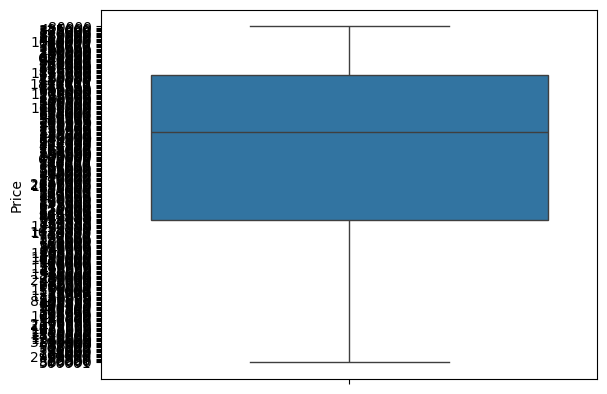

In [747]:
import seaborn as sns

sns.boxplot(data=df["Price"])

In [748]:
median = df["Price"].median()
median

290000.0

In [749]:
df["Price"].fillna(median, inplace=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,hyundai,2007,80000,"45,000 kms",Petrol
1,mahindra jeep cl550 mdi,mahindra,2006,425000,40 kms,Diesel
2,maruti suzuki alto 800 vxi,maruti,2018,290000.0,"22,000 kms",Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,hyundai,2014,325000,"28,000 kms",Petrol
4,ford ecosport titanium 1.5l tdci,ford,2014,575000,"36,000 kms",Diesel
...,...,...,...,...,...,...
886,toyota corolla altis,toyota,2009,300000,"1,32,000 kms",Petrol
888,tata zest xm diesel,tata,2018,260000,"27,000 kms",Diesel
889,mahindra quanto c8,mahindra,2013,390000,"40,000 kms",Diesel
890,honda amaze 1.2 e i vtec,honda,2014,180000,Petrol,NaN


In [750]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    3
fuel_type     6
dtype: int64

# **"kms_driven" column**

In [751]:
df["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [752]:
data = df[df["kms_driven"] == "Petrol"]
data

,name,company,year,Price,kms_driven,fuel_type
890,honda amaze 1.2 e i vtec,honda,2014,180000,Petrol,NaN
891,chevrolet sail 1.2 lt abs,chevrolet,2014,160000,Petrol,NaN


In [753]:
df["fuel_type"].loc[890] = "Petrol"
df["fuel_type"].loc[891] = "Petrol"

data = df[df["kms_driven"] == "Petrol"]
data

,name,company,year,Price,kms_driven,fuel_type
890,honda amaze 1.2 e i vtec,honda,2014,180000,Petrol,Petrol
891,chevrolet sail 1.2 lt abs,chevrolet,2014,160000,Petrol,Petrol


In [754]:
df["kms_driven"].replace("Petrol", np.NaN, inplace=True)
df["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [755]:
df["kms_driven"] = df["kms_driven"].str.replace("," , "")
df["kms_driven"] = df["kms_driven"].str.replace(" kms" , "")

df["kms_driven"].unique()

array(['45000', '40', '22000', '28000', '36000', '59000', '41000',
       '25000', '24530', '60000', '30000', '32000', '48660', '4000',
       '16934', '43000', '35550', '39522', '39000', '55000', '72000',
       '15975', '70000', '23452', '35522', '48508', '15487', '82000',
       '20000', '68000', '38000', '27000', '33000', '46000', '16000',
       '47000', '35000', '30874', '15000', '29685', '130000', '19000',
       nan, '54000', '13000', '38200', '50000', '13500', '3600', '45863',
       '60500', '12500', '18000', '13349', '29000', '44000', '42000',
       '14000', '49000', '36200', '51000', '104000', '33333', '33600',
       '5600', '7500', '26000', '24330', '65480', '28028', '99000',
       '2800', '21000', '11000', '66000', '3000', '7000', '38500',
       '37200', '43200', '24800', '45872', '40000', '11400', '97200',
       '52000', '31000', '175430', '37000', '65000', '3350', '75000',
       '62000', '73000', '2200', '54870', '34580', '97000', '60', '80200',
       '3200', '00

In [756]:
median = df["kms_driven"].median()
median

41000.0

In [757]:
df["kms_driven"].fillna(median, inplace=True)
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     4
dtype: int64

# "fuel_type" column

In [758]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [759]:
mode = df["fuel_type"].mode()[0]
mode

'Petrol'

In [760]:
df["fuel_type"].fillna(mode, inplace=True)

df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        749 non-null    object
 1   company     749 non-null    object
 2   year        749 non-null    object
 3   Price       749 non-null    object
 4   kms_driven  749 non-null    object
 5   fuel_type   749 non-null    object
dtypes: object(6)
memory usage: 57.1+ KB


In [762]:
df["Price"] = df["Price"].astype(int)
df["kms_driven"] = df["kms_driven"].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        749 non-null    object
 1   company     749 non-null    object
 2   year        749 non-null    object
 3   Price       749 non-null    int32 
 4   kms_driven  749 non-null    int32 
 5   fuel_type   749 non-null    object
dtypes: int32(2), object(4)
memory usage: 51.3+ KB


In [763]:
df.to_csv("cleaned_car_data.csv", index=False)

df = pd.read_csv("cleaned_car_data.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,hyundai santro xing xo erlx euro iii,hyundai,2007,80000,45000,Petrol
1,mahindra jeep cl550 mdi,mahindra,2006,425000,40,Diesel
2,maruti suzuki alto 800 vxi,maruti,2018,290000,22000,Petrol
3,hyundai grand i10 magna 1.2 kappa vtvt,hyundai,2014,325000,28000,Petrol
4,ford ecosport titanium 1.5l tdci,ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
744,toyota corolla altis,toyota,2009,300000,132000,Petrol
745,tata zest xm diesel,tata,2018,260000,27000,Diesel
746,mahindra quanto c8,mahindra,2013,390000,40000,Diesel
747,honda amaze 1.2 e i vtec,honda,2014,180000,41000,Petrol


# Data Preprocessing

In [764]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [765]:
le = LabelEncoder()

df["name"] = le.fit_transform(df["name"])
df["company"] = le.fit_transform(df["company"])
df["fuel_type"] = le.fit_transform(df["fuel_type"])
df["year"] = le.fit_transform(df["year"])

df

,name,company,year,Price,kms_driven,fuel_type
0,160,9,8,80000,45000,2
1,187,13,7,425000,40,0
2,233,14,19,290000,22000,2
3,130,9,15,325000,28000,2
4,53,6,15,575000,36000,0
...,...,...,...,...,...,...
744,422,23,10,300000,132000,2
745,420,22,19,260000,27000,0
746,195,13,14,390000,40000,0
747,72,8,15,180000,41000,2


In [766]:
df.to_csv("preprocessed_car_data.csv", index=True)

## Model Trainig & Model Evaluation

In [767]:
X = df.drop(columns=["Price"])
Y = df["Price"]

In [768]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred  = linear_model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print(r2score)

0.07985806673277851


In [769]:
from sklearn.linear_model import TweedieRegressor

tweedie_model = TweedieRegressor()
tweedie_model.fit(X_train, y_train)

y_pred  = tweedie_model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print(r2score)

0.1413217774629406


C:\Users\sakhii computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [770]:
from sklearn.ensemble import ExtraTreesRegressor

extra_trees_model = ExtraTreesRegressor()
extra_trees_model.fit(X_train, y_train)

y_pred  = extra_trees_model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print(r2score)

0.5248831252582595


In [771]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

y_pred  = gradient_boosting_model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print(r2score)

0.41277862451309566


In [772]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gradient_model = HistGradientBoostingRegressor()
hist_gradient_model.fit(X_train, y_train)

y_pred  = hist_gradient_model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print(r2score)

0.45000012491660935


# Conclusion:

### ExtraTreesRegressor have highest r2_score

- pickling the model

In [773]:
import pickle

file = open("car_price_predictor.pkl", "wb")

pickle.dump(extra_trees_model, file)
file.close()

In [774]:
my_model = pickle.load(open("car_price_predictor.pkl", "rb"))

my_model.predict([["130", "9", "15", "5000", "2"]])

C:\Users\sakhii computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([330829.62])